In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
#%matplotlib notebook

In [49]:

def deriv_1(t,xyzabc,bm,g,case): # função para passar os parâmetros para integração no caso da bala de canhão
    x,y,z,a,b,c = xyzabc
    j = 6.5*10**(-3) # j= a
    alpha =2.5 
    temp0 = 296.15 # temp0 = T0
    p = (1-(j*z/temp0))**alpha # rho da variação da densidade do ar, j =a e temp0 = T0
    v = (a**2+b**2+c**2)**(1/2) # módulo da velocidade
    if case == 0: # caso do movimento no vácuo
         return[a,b,c,0,0,-g]
    if case == 1:# caso da resistência do ar
        return[a,b,c,-bm*((a**2+b**2+c**2)**(1/2))*a,-bm*((a**2+b**2+c**2)**(1/2))*b,-bm*((a**2+b**2+c**2)**(1/2))*c-g]
    if case == 2: # caso da resistência do ar + a variação da densidade 
         return[a,b,c,-p*bm*v*a,-p*bm*v*b,-p*bm*v*c-g]
        

def simula_1(delta_t,bm,theta0,case): # simulação da bala de canhão 
    v0 = 700 # velocidade inicial
    t0 = 0
    g = 9.81 # aceleração da gravidade
    theta0rad = (np.pi*theta0)/180 # conversão de graus para radiânos
    iniciais = [0,0,0,v0*np.cos(theta0rad),0,v0*np.sin(theta0rad)] # lista que contem os parâmetros iniciais
    r = ode(deriv_1) 
    r.set_initial_value(iniciais,t0)
    r.set_f_params(bm,g,case)
    t1 = [t0]
    xyzabc_1 = [iniciais] # lista que guarda os valores de x,y,z,a,b,c
    ultimoz = 1 # guarda o último valor de z
    while r.successful() and ultimoz>0: # simula enquanto a integração dá certo e o último z é maior que 0
        new_t = r.t + delta_t
        t1.append(new_t)
        new_xyzabc = r.integrate(new_t)
        xyzabc_1.append(new_xyzabc)
        ultimoz = new_xyzabc[2]
    xyzabc_1 = np.array(xyzabc_1) # converte a lista para array para indexação
    xs = xyzabc_1[:,0]
    ys = xyzabc_1[:,1]
    zs = xyzabc_1[:,2]
    return [xs,ys,zs]
   

   - O alcance máximo acontece com um ângulo de $45º$, como no caso ideal?
   
   Para descobrir qual o ângulo que leva ao máximo alcance plota-se a tragetória para ângulos entre $37$ a $46$ (de dois em dois);deste resultado vê-se que o ângulo que leva ao maior alcance está entre $39$ e $41$.

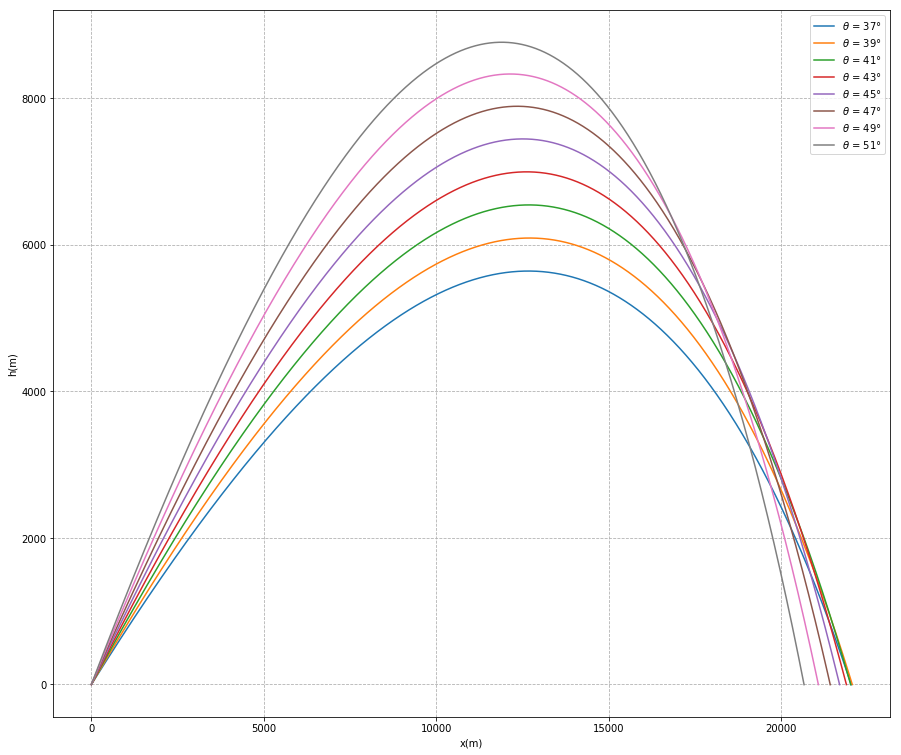

In [62]:
    prot = [] # lista para guardar os plots para vários ângulos
    delta_t = 0.01 # variação do tempo
    bm = 4*10**(-5)  # parâmetro B/m
    plt.figure(figsize=(15,13))  # tamanho do plot
    for i in range (37,52,2): # for para pegar os dados para vários ângulos
        result = (simula_1(delta_t,bm,i,1))
        a,= plt.plot(result[0],result[2],label = r'$\theta$ = '+str(i)+'°')
        prot.append(a)
    plt.grid(linestyle='--')
    plt.xlabel('x(m)')
    plt.ylabel('h(m)')
    plt.legend(handles=prot)
    plt.show()

In [63]:
    result_11= [] # lista que guarda o resultado da simulação
    dist_max = [0,0] # lista que guarda o ângulo para a distância máxima e a distância máxima
    for i in range (39,42):
        result_11 = (simula_1(delta_t,bm,i,1))
        if result_11[0][-1] > dist_max[0]: # condicional que seleciona o maior valor de x entre os angulos simulados
            dist_max[0] = result_11[0][-1]
            dist_max[1] = i
    dist_max

[22057.561833366737, 39]


Então o ângulo que dá a distância máxima é de $39°$ e a distância máxima é $22057.6\hspace{0.1cm}m$

- O quanto o alcance do tiro é afetado pela resistência do ar?



Comparando este resultado com o movimento sem resistência do ar:

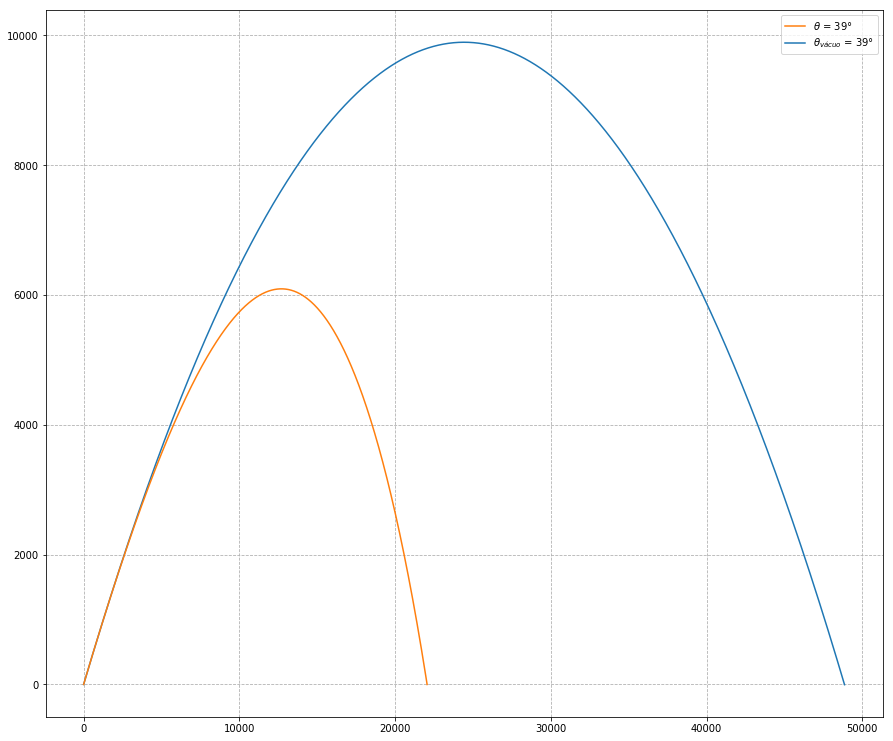

In [65]:
vacuo = simula_1(delta_t,bm,39,0) # simula para o caso no movimento no vácuo
result_11 = simula_1(delta_t,bm,39,1)
plt.figure(figsize=(15,13)) 
v, = plt.plot(vacuo[0],vacuo[2],label = r'$\theta_{vácuo}$ = 39°')
r,= plt.plot(result_11[0],result_11[2],label = r'$\theta$ = 39°')
plt.grid(linestyle='--')
plt.legend(handles=[r,v])
plt.show()

 A diferença entre os alcances é :

In [54]:
-result_11[0][-1] + vacuo[0][-1]

26804.71334728373

 Logo vê-se que a resistência do ar afeta drásticamente o alcance da bala de canhão.

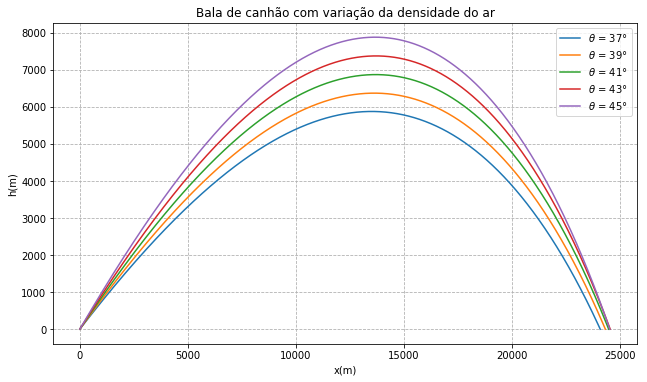

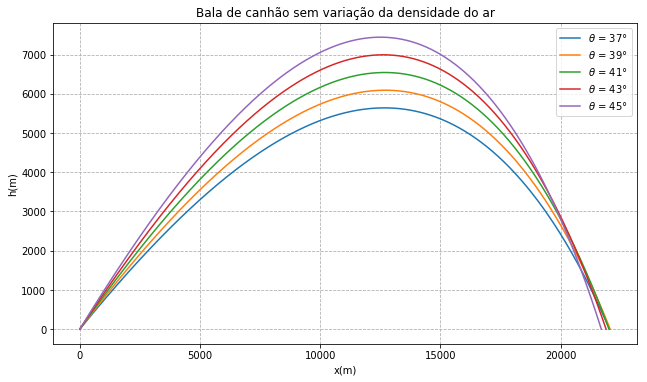

In [66]:
    # Simulação para o caso da bala de canhão com a variação da densidade do ar em comparação com a que não varia
    
    prot_2 = [] # lista para guardar os plots da simulação da variação da densidade do ar 
    
    plt.figure(figsize=(23,13))
    plt.subplot(222)
    plt.title('Bala de canhão com variação da densidade do ar')
    for i in range (37,46,2):
        result_2 = (simula_1(delta_t,bm,i,2))
        k,= plt.plot(result_2[0],result_2[2],label = r'$\theta$ = '+str(i)+'°')
        prot_2.append(k)
    plt.grid(linestyle='--')
    plt.xlabel('x(m)')
    plt.ylabel('h(m)')
    plt.legend(handles=prot_2)
   
    plt.figure(figsize=(23,13))
    plt.subplot(222)
    plt.title('Bala de canhão sem variação da densidade do ar')
    prot = []
    for i in range (37,46,2):
        result = (simula_1(delta_t,bm,i,1))
        a,= plt.plot(result[0],result[2],label = r'$\theta$ = '+str(i)+'°')
        prot.append(a)
    plt.grid(linestyle='--')
    plt.xlabel('x(m)')
    plt.ylabel('h(m)')
    plt.legend(handles=prot)
    
    plt.show()

In [86]:
def deriv_2(t,xyzabc,g,case): # função que passa os parâmetros para a ODE no caso da bala de baseball 
    x,y,z,a,b,c = xyzabc
    bm0 = 3.9*10**-3 # termo que soma com o termo da exponêncial
    delta = 5
    par1 = 5.8 * 10**-3 
    vd = 35 
    v = (a**2+b**2+c**2)**(1/2) # módulo da velocidade
    s0m = 4.1*10**-4 # parâmetro s0/m para os casos com spin
    w0 = 30 # velocidade ângular da bola de baseball
    par2 = np.exp((v - vd)/delta)
    if case == -2: # caso da bola de baseball com variação do ar
        return[a,b,c,-(bm0 + par1/(1 +par2))*v*a,-(bm0 + par1/(1 +par2))*v*b,-(bm0 + par1/(1 +par2))*v*c-g]
    if case == -1: # caso da bola de baseball sem a variação da densidade do ar
        par2 = np.exp((-vd)/delta)
        return[a,b,c,-(bm0 + par1/(1 +par2))*v*a,-(bm0 + par1/(1 +par2))*v*b,-(bm0 + par1/(1 +par2))*v*c-g]
    if case == 1: # caso da bola de baseball com spin na direção y positivo
        return[a,b,c,-(bm0 + par1/(1 +par2))*v*a + s0m*w0*c,-(bm0 + par1/(1 +par2))*v*b,-(bm0 + par1/(1 +par2))*v*c-g -s0m*w0*a]
    if case == 2: # caso da bola de baseball com spin na direção y negativo
        return[a,b,c,-(bm0 + par1/(1 +par2))*v*a - s0m*w0*c,-(bm0 + par1/(1 +par2))*v*b,-(bm0 + par1/(1 +par2))*v*c-g + s0m*w0*a]
    if case == 3: # caso da bola de baseball com spin na direção z positivo
        return[a,b,c,-(bm0 + par1/(1 +par2))*v*a - s0m*w0*b,-(bm0 + par1/(1 +par2))*v*b -s0m*w0*a,-(bm0 + par1/(1 +par2))*v*c-g]
    if case == 4: # caso da bola de baseball com spin na direção z negativo
        return[a,b,c,-(bm0 + par1/(1 +par2))*v*a +  s0m*w0*b,-(bm0 + par1/(1 +par2))*v*b +s0m*w0*a,-(bm0 + par1/(1 +par2))*v*c-g]

def simula_2(delta_t3,theta0,case): # simulação para a bola de baseball, onde o parâmetro case indica os casos propostos
    v0 = 50 # velocidade inicial
    t0 = 0
    g  = 9.81
    theta0rad = (np.pi*theta0)/180
    iniciais = [0,0,1,v0*np.cos(theta0rad),0,v0*np.sin(theta0rad)]
    r_3 = ode(deriv_2)
    r_3.set_initial_value(iniciais,t0)
    r_3.set_f_params(g,case)
    t3 = [t0]
    xyzabc_3 = [iniciais]
    ultimoz_3 = 1
    while r_3.successful() and ultimoz_3>0:
        new_t3 = r_3.t + delta_t3
        t3.append(new_t3)
        new_xyzabc3 = r_3.integrate(new_t3)
        xyzabc_3.append(new_xyzabc3)
        ultimoz_3 = new_xyzabc3[2]
    xyzabc_3 = np.array(xyzabc_3)
    xs_3 = xyzabc_3[:,0]
    ys_3 = xyzabc_3[:,1]
    zs_3 = xyzabc_3[:,2]
    return [xs_3,ys_3,zs_3]
   

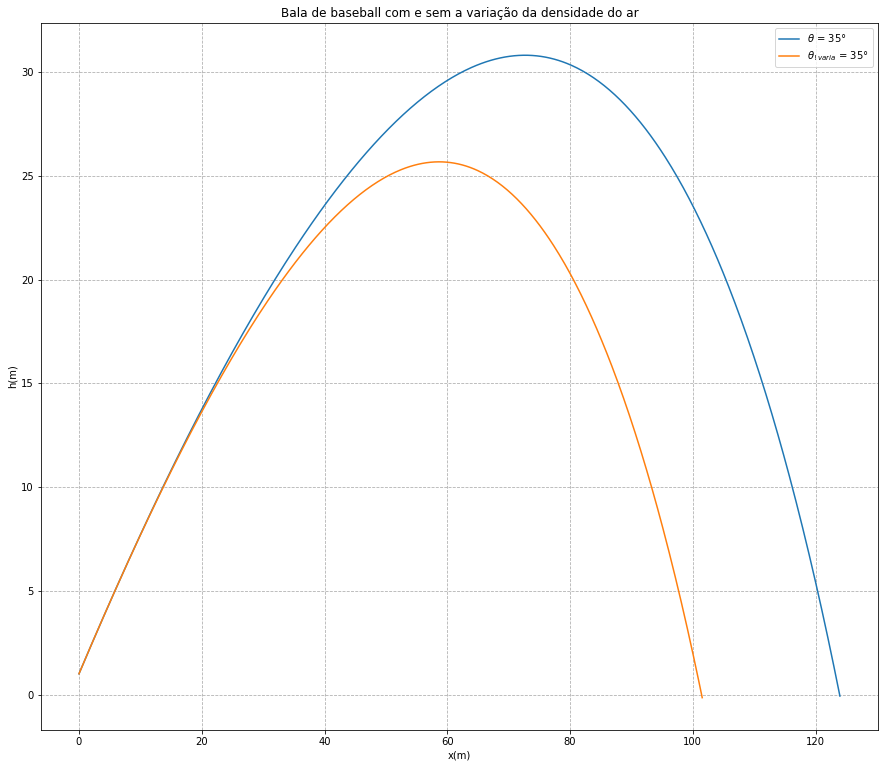

In [87]:
    plt.figure(figsize=(15,13)) 
    plt.title('Bala de baseball com e sem a variação da densidade do ar')
    result_3 = simula_2(delta_t,35,-2) # caso com variação da densidade do ar apenas
    k,= plt.plot(result_3[0],result_3[2],label = r'$\theta$ = 35°')
    result_3 = simula_2(delta_t,35,-1) # caso sem variação da densidade do ar
    a,= plt.plot(result_3[0],result_3[2],label = r'$\theta_{!varia}$ = 35°')
    plt.grid(linestyle='--')
    plt.xlabel('x(m)')
    plt.ylabel('h(m)')
    plt.legend(handles=[k,a])
    plt.show()

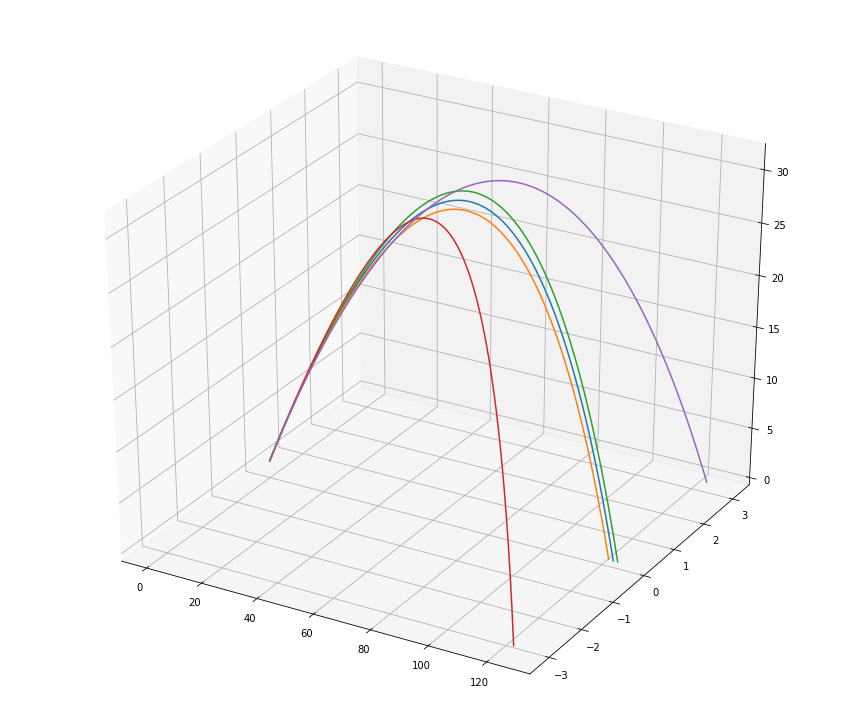

In [88]:
result_4 = []
fig = plt.figure(figsize=(15,13)) 
ax = fig.gca(projection='3d')
result_4.append(simula_2(delta_t,35,-2))
result_4.append(simula_2(delta_t,35,1))
result_4.append(simula_2(delta_t,35,2))
result_4.append(simula_2(delta_t,35,3))
result_4.append(simula_2(delta_t,35,4))
ax.plot(result_4[0][0],result_4[0][1],result_4[0][2],label = 'caso sem efeito Magnus')
ax.plot(result_4[1][0],result_4[1][1],result_4[1][2],label = 'caso 1')
ax.plot(result_4[2][0],result_4[2][1],result_4[2][2],label = 'caso 2')
ax.plot(result_4[3][0],result_4[3][1],result_4[3][2],label = 'caso 3')
ax.plot(result_4[4][0],result_4[4][1],result_4[4][2],label = 'caso 4')
plt.show()
        

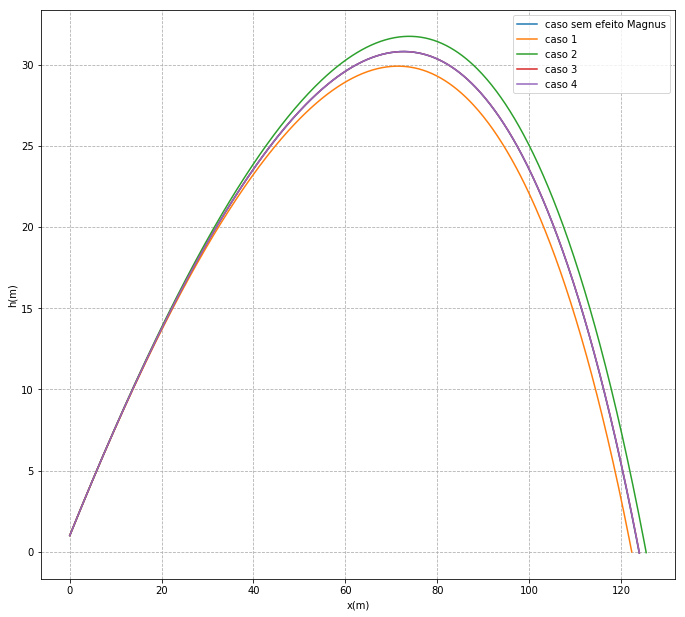

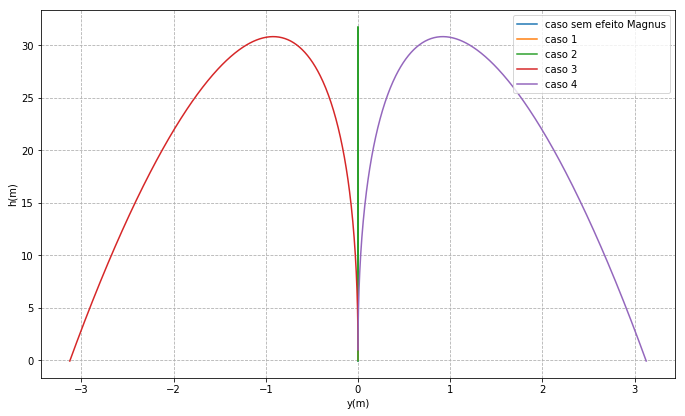

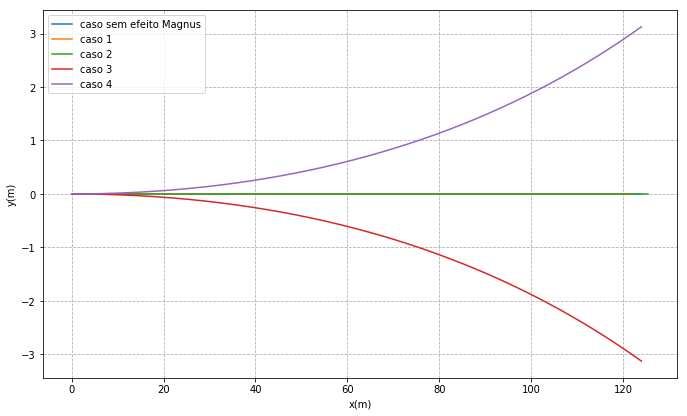

In [89]:
plt.clf() # plot nos planos para melhor visualização
fig = plt.figure(figsize=(25,23)) 
plt.subplot(222) # para o plano xz
ps40, = plt.plot(result_4[0][0],result_4[0][2],label = 'caso sem efeito Magnus')
ps41, = plt.plot(result_4[1][0],result_4[1][2],label = 'caso 1')
ps42, = plt.plot(result_4[2][0],result_4[2][2],label = 'caso 2')
ps43, = plt.plot(result_4[3][0],result_4[3][2],label = 'caso 3')
ps44, = plt.plot(result_4[4][0],result_4[4][2],label = 'caso 4')
plt.xlabel('x(m)')
plt.ylabel('h(m)')
plt.legend(handles=[ps40,ps41,ps42,ps43,ps44])
plt.grid(linestyle='--')
plt.show()

plt.clf() 
fig = plt.figure(figsize=(25,23)) 
plt.subplot(323) # para o plano yz
ps401, = plt.plot(result_4[0][1],result_4[0][2],label = 'caso sem efeito Magnus')
ps411, = plt.plot(result_4[1][1],result_4[1][2],label = 'caso 1')
ps421, = plt.plot(result_4[2][1],result_4[2][2],label = 'caso 2')
ps431, = plt.plot(result_4[3][1],result_4[3][2],label = 'caso 3')
ps441, = plt.plot(result_4[4][1],result_4[4][2],label = 'caso 4')
plt.xlabel('y(m)')
plt.ylabel('h(m)')
plt.legend(handles=[ps401,ps411,ps421,ps431,ps441])
plt.grid(linestyle='--')
plt.show()


plt.clf() 
fig = plt.figure(figsize=(25,23)) 
plt.subplot(323) # para o plano xy
ps402, = plt.plot(result_4[0][0],result_4[0][1],label = 'caso sem efeito Magnus')
ps412, = plt.plot(result_4[1][0],result_4[1][1],label = 'caso 1')
ps422, = plt.plot(result_4[2][0],result_4[2][1],label = 'caso 2')
ps432, = plt.plot(result_4[3][0],result_4[3][1],label = 'caso 3')
ps442, = plt.plot(result_4[4][0],result_4[4][1],label = 'caso 4')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.legend(handles=[ps402,ps412,ps422,ps432,ps442])
plt.grid(linestyle='--')
plt.show()

 - No caso em que a a velocidade angular está na direção +y (1) a rotação da bola nessa direção fará uma força para baixo, portanto terá uma altura menor que todos os outros casos -como se vê pelo gráfico de x por z- e também terá uma força na direção de x positivo.
 
 - Para o caso em que a velocidade angular está na direção -y (2) a rotação da bola fará uma força para cima, portanto chegará uma altura maior que todos os outros casos. 
 
 - Considerando o caso em que a velocidade angular está na direção +z (3) a rotação da bola fará uma força na direção de -y, o que fará com que a bola faça uma curva nessa direção. Como não há velocidade na direção de y essa será a única força causada pelo spin. A altura não será afetada e portanto ela terá a mesma altura que o caso sem o spin.
 
 - E por fim o caso em que a velocidade angular está na direção +z (4) a rotação da bola fará uma força na direçãode +y, o que fará com que a bola faça uma curva nessa direção e será também a única força causada pelo spin. Como a altura não será afetada, esta terá a memsa que o caso (3) e o caso sem spin. Pelos primeiro gráfico vê-se que eles estão superpostos, assim como o caso (1) e (2) e o sem spin estão superpostos no gráfico de y por z e x por y.